In [1]:
%run '~/git/Bibliotecas.ipynb'

In [2]:
r_pa_ad=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/r_pa_ad.csv')
r_pa_ad.head(1)

,Ano1,KT_f,miFOB_f_ad,KT_c_ad,miFOB_c_ad,rel_preço_ad,mm_ad,Ano2,Ano3,Ano4,Ano5,Ano6,Ano7,Ano8,Ano9,Ano10,Ano11,Ano12
0,2007.0,87.156081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
best=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/best.csv')
best

,ano_tipo,duração_treino,c_l
0,Ano1,5,"mm_ad,KT_c_ad,miFOB_c_ad"


In [4]:
multi_col=best.c_l.str.split(',',expand=True).iloc[0,:].tolist()

In [5]:
kt_f=['KT_f']
kt_f

['KT_f']

In [6]:
ano=[best.ano_tipo.values[0]]

In [7]:
r=r_pa_ad[ano+kt_f+multi_col].dropna(subset=['Ano1']+multi_col)
r=r.tail(best.duração_treino.values[0]+1)

In [8]:
train=r.iloc[:-1,:]
pred=r.iloc[-1:,:]

In [9]:
X_train=train.drop(columns='KT_f')
y_train=train.KT_f
X_pred=pred.drop(columns='KT_f')

In [10]:
RFR.fit(X_train,y_train)
pred_24=X_pred.assign(KT_f=RFR.predict(X_pred))
pred_24

,Ano1,mm_ad,KT_c_ad,miFOB_c_ad,KT_f
17,2024.0,1586.666667,126.854192,477.469464,115.372616


In [11]:
a=r[['Ano1','KT_f']].dropna().assign(tipo='real')
a

,Ano1,KT_f,tipo
12,2019.0,126.452277,real
13,2020.0,89.556108,real
14,2021.0,150.754876,real
15,2022.0,104.981396,real
16,2023.0,104.631970,real


In [12]:
r_pa_ad

,Ano1,KT_f,miFOB_f_ad,KT_c_ad,miFOB_c_ad,rel_preço_ad,mm_ad,Ano2,Ano3,Ano4,Ano5,Ano6,Ano7,Ano8,Ano9,Ano10,Ano11,Ano12
0,2007.0,87.156081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008.0,67.505794,24.074006,60.627931,137.347237,0.121928,1499.134428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,37.929771,38.883624,56.066360,151.842238,0.212684,1610.163684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,106.642892,11.611076,45.527583,109.861488,0.126859,1757.516250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011.0,108.483294,31.688803,49.985947,162.107872,0.091626,1117.574187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,94.857045,33.404397,136.335932,312.332136,0.118408,1210.147769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
201,NaN,154.054876,22.608631,119.804609,281.335455,0.101497,1224.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
202,NaN,103.928104,55.216038,123.396034,330.416247,0.133853,1252.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
203,NaN,99.459221,67.565339,126.928013,566.404414,0.145687,1242.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0


In [13]:
b=pd.concat([a,pred_24[['Ano1','KT_f']].assign(tipo='previsão_RFR'),r_pa_ad[['Ano1','KT_f']].dropna().assign(tipo='real')])

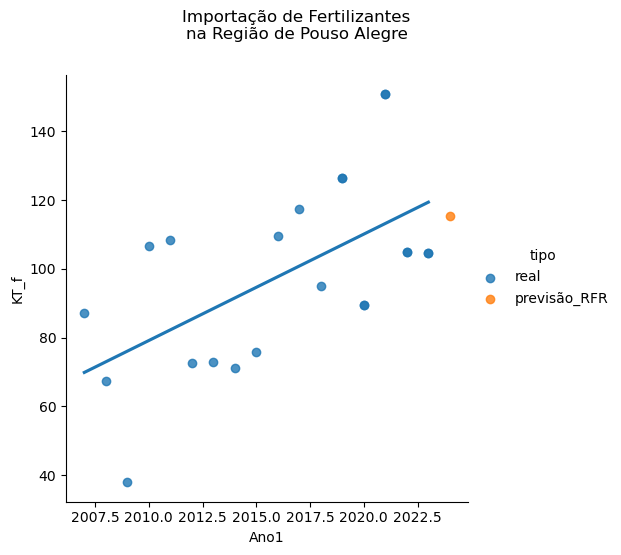

In [14]:
sns.lmplot(data=b,x='Ano1',y='KT_f',hue='tipo',order=1, ci=None)\
.fig.suptitle('Importação de Fertilizantes\nna Região de Pouso Alegre',y=1.1)
plt.show()

In [15]:
q=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/q1.csv')

In [16]:
print(f"Previsão de Importação de Fertilizantesda na Região de Pouso Alegre\n\
no ano de 2024 é de {round(pred_24.KT_f.values[0])} mil toneladas.\n")
print(f"Expectativa média de erro {round(best.merge(q)['test_f%_RFR'].mean())}%")
print(f"Expectativa de desvio padrão no erro {round(best.merge(q)['test_f%_RFR'].std())}%")

Previsão de Importação de Fertilizantesda na Região de Pouso Alegre
no ano de 2024 é de 115 mil toneladas.

Expectativa média de erro -7%
Expectativa de desvio padrão no erro 20%
